In [38]:
#importing the dependencied
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#getting the data
data = pd.read_csv("Cellphone.csv")

In [107]:
#retriving last five columns
data.tail()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [41]:
#cheaking is there any null values present in the data set 
data.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [42]:
#cheaking all the rows and columns of the data
data.shape

(161, 14)

In [62]:
#saparating labels and features
X = data.drop('Price',axis = 1)
Y = data['Price']

In [68]:
Y

0      2357
1      1749
2      1916
3      1315
4      1749
       ... 
156    3551
157    3211
158    3260
159    3211
160    2536
Name: Price, Length: 161, dtype: int64

In [45]:

sns.set_context('talk')
#sns.set_palette(palette)
sns.set_style('white')

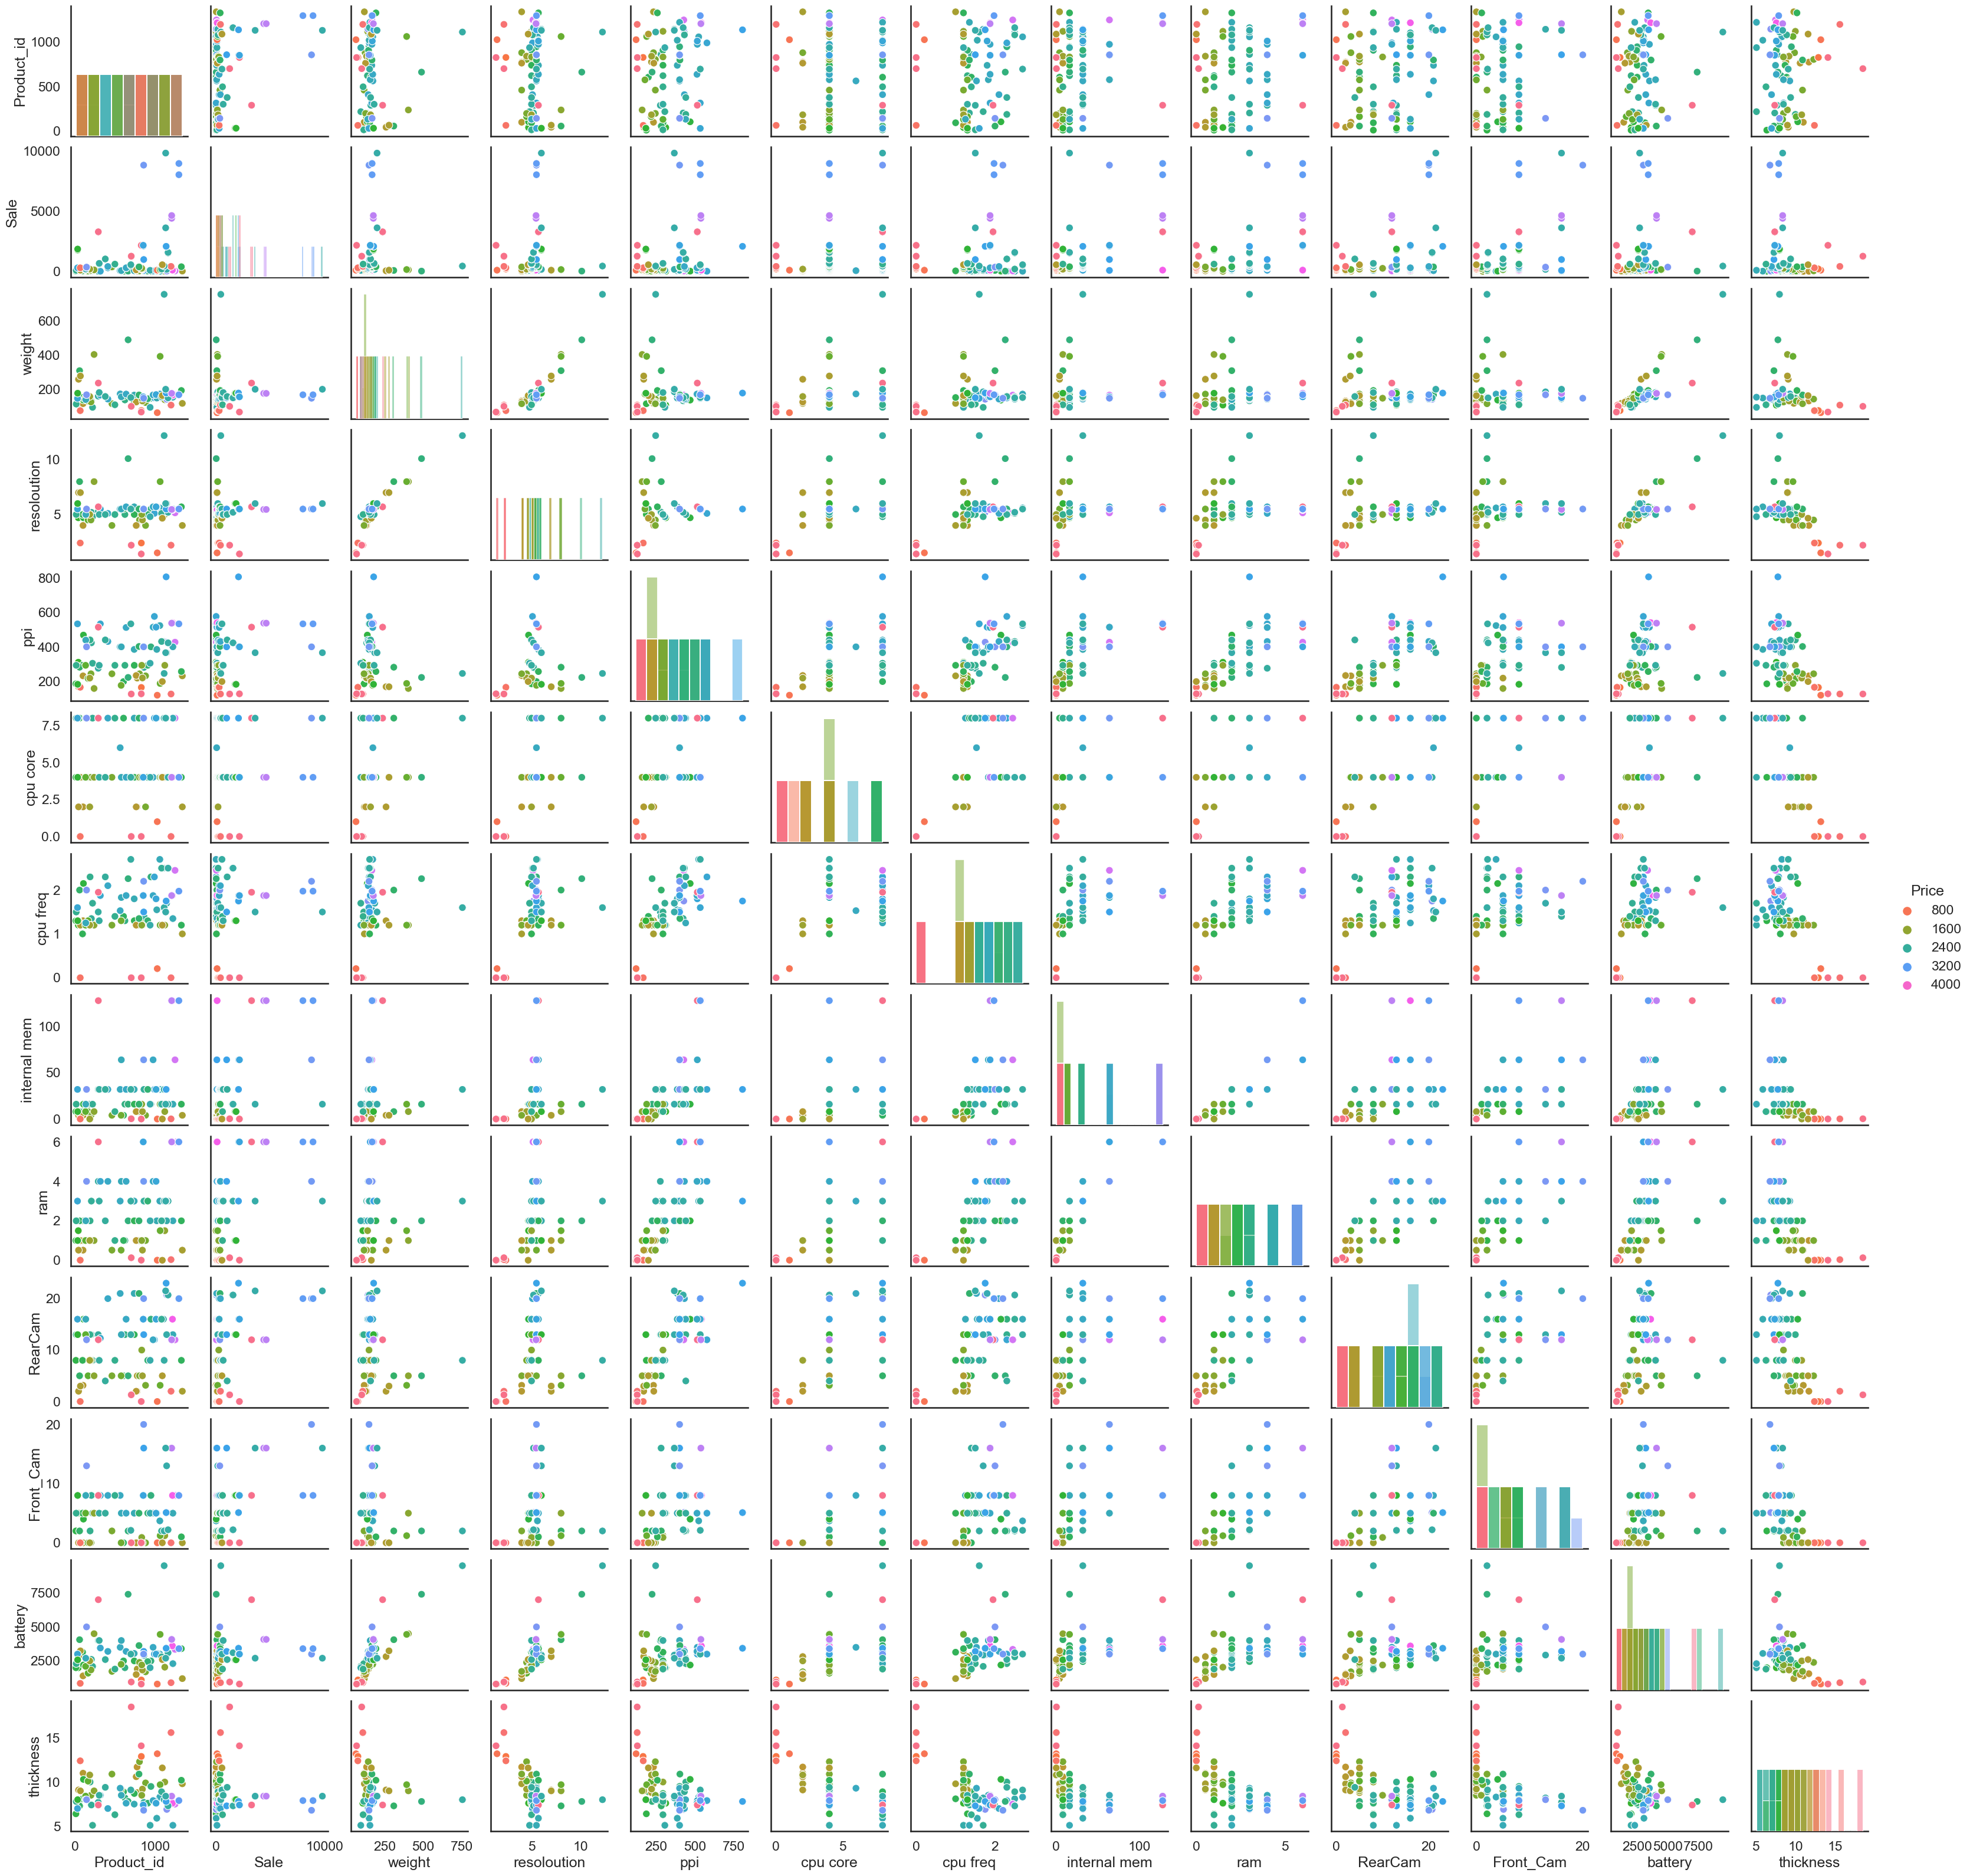

In [46]:
#cheaking the correlation between the features
sns.pairplot(data, hue='Price',diag_kind = 'hist',palette = 'husl')
plt.show()

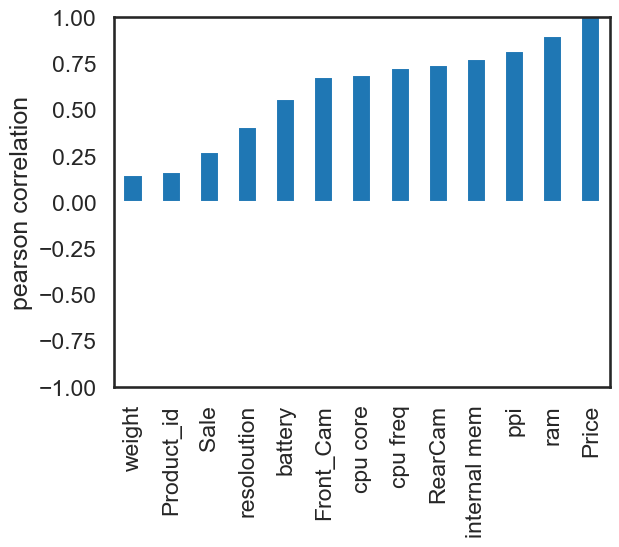

In [47]:
#cheaking the correlation using bar plot
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

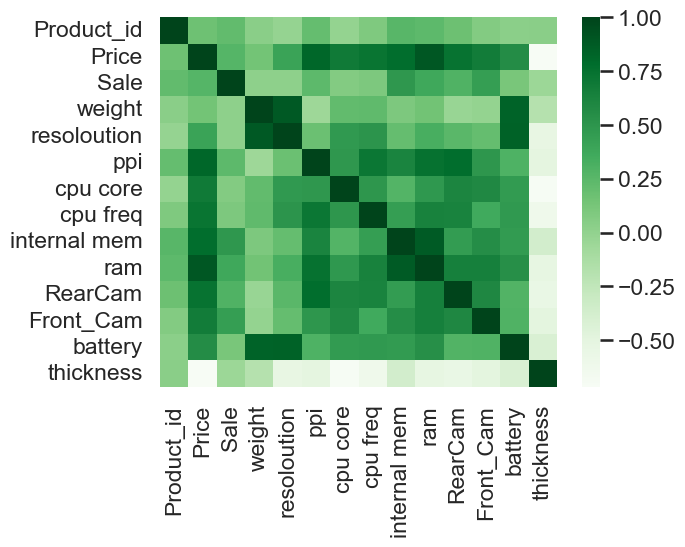

<Figure size 1500x1500 with 0 Axes>

In [58]:
# finding the correlation with in features
corrMatrix = data.corr(method='pearson')
sns.heatmap(corrMatrix, cmap="Greens")
plt.xticks(rotation=90)
plt.figure(figsize= (15,15))
plt.show()

In [59]:
#importing the train test split
from sklearn.model_selection import train_test_split

In [71]:
# train and test the data by splitting
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 45)

In [73]:
print(X.shape,x_train.shape,x_test.shape)

(161, 13) (112, 13) (49, 13)


In [74]:
from xgboost import XGBRegressor
#xg boost is kind of decision tree algorith and it very much usefull for regression
#problem
from sklearn import metrics

In [75]:
#creating the instance of xgb regressor
xgb = XGBRegressor()

In [76]:
#fitting the model
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [78]:
#prdicting the labels using training data set
y_pred = xgb.predict(x_train)

In [79]:
y_pred

array([1347.0055 , 2570.998  , 2392.0234 , 3054.9946 , 1675.9998 ,
       2409.0017 , 2123.9968 , 1989.0266 , 1346.993  , 2275.9807 ,
       2859.0178 , 3836.994  , 1302.0011 , 2444.9817 , 1843.0013 ,
       2466.012  , 1238.0063 , 2743.9983 , 3315.994  , 1396.0039 ,
       1916.0024 , 2391.9675 , 2087.006  , 2744.     , 3550.999  ,
       2491.001  , 2136.9998 , 1740.9977 , 3102.0051 , 2265.9985 ,
       3116.0005 , 1511.0205 , 2579.99   , 2437.9998 , 1646.0071 ,
       1612.0029 , 2714.01   , 2409.0017 , 3837.0046 , 3054.9946 ,
       4360.997  , 2562.005  , 2044.0043 , 3004.977  , 1809.998  ,
        791.00104, 2136.9998 , 1302.0011 , 1777.0016 , 1830.9884 ,
       1740.9949 , 3211.001  , 2858.0056 , 1734.001  , 2562.005  ,
       2001.     , 2823.9995 , 1988.9802 ,  704.9999 , 2536.0005 ,
       3211.001  , 2938.     , 2342.9912 , 2976.9905 , 1522.0072 ,
       2508.0012 , 3550.999  ,  832.981  , 2974.9993 , 2974.9993 ,
        614.009  , 3286.997  , 2257.9963 , 1984.0013 , 1357.00

In [80]:
# R square error
score_1 = metrics.r2_score(y_train,y_pred)

#mean absolute error
score_2 = metrics.mean_absolute_error(y_train,y_pred)

In [81]:
score_1

0.999999999878122

In [82]:
score_2

0.005420684814453125

Text(0.5, 1.0, 'Actual price vs predicted price')

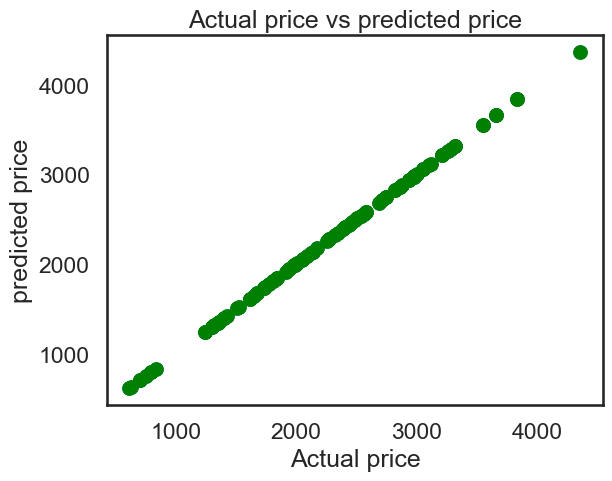

In [83]:
#plotting a scatter plot between actual and predicted values
plt.scatter(y_train,y_pred)
plt.scatter(y_train,y_pred,color = 'green')


plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")

In [84]:
#testing the sample
xgb.fit(x_test,y_test)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [85]:
#predicting the test sample
test_sample_prediction = xgb.predict(x_test)

In [86]:
test_sample_prediction

array([1776.9998 , 2356.999  , 2044.0002 , 1733.9995 , 2746.0002 ,
       1315.0013 , 2746.0002 , 2266.     , 3004.9988 , 2653.9973 ,
       2859.0005 , 2880.0002 , 2438.0002 ,  614.0012 , 2123.9995 ,
       1920.9999 ,  832.99835, 2491.0007 , 3102.0002 ,  628.00006,
       2685.     , 2570.9993 , 4360.999  , 1522.0001 , 1390.     ,
       2858.0017 , 1950.0001 , 1646.0004 , 2465.9995 , 1420.9994 ,
       3116.     , 1748.9993 , 2444.9983 , 2744.0002 , 2323.0012 ,
       2342.9998 , 1920.9999 , 3286.9998 , 1390.     , 1511.0021 ,
       2744.     , 2005.9998 , 2714.0012 , 1830.9994 , 2257.9995 ,
       2654.002  ,  753.99994, 2087.001  , 1749.0002 ], dtype=float32)

In [88]:
r2 = metrics.r2_score(y_test,test_sample_prediction)

In [89]:
mean_absolute_error  = metrics.mean_absolute_error(y_test,test_sample_prediction)

In [90]:
print(r2,mean_absolute_error)

0.9999999999985109 0.0006265445631377551


In [99]:
x_test.tail()

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
30,187,26,150.0,5.0,441,4,2.30,16.000,2.000,13.00,2.0,2300,10.0
33,1020,30,151.0,5.7,386,8,1.55,32.000,2.000,16.00,5.0,3050,5.9
113,64,308,77.9,2.4,167,0,0.00,0.004,0.004,0.00,0.0,850,12.4
43,907,40,147.0,5.0,294,4,1.30,32.000,3.000,8.00,5.0,2450,7.6
1,880,10,125.0,4.0,233,2,1.30,4.000,1.000,3.15,0.0,1700,9.9


In [103]:
#predicting the value 
P = xgb.predict(np.array([[187,26,150.0,5.0,441,4,2.30,16.000,2.000,13.00,2.0,2300,10.0]]))

In [104]:
print("the predicted price of the features is:",P)

the predicted price of the features is: [2257.9995]
